# Analyzing the Top Spotify Songs of the 2010s 

## By: Chris Rha, Christy Yau, and Amar Mujumdar

## 1. Introduction

There have been many different music trends throughout each year. Top songs, popular genres, and top artists change every year. We can look up top songs from 2010 to 2019 online, but we won't understand music trends of each year just by looking at song titles and artists. We can use Spotify to gather data on top streamed songs of each year from 2010 to 2019. Spotify is a popular music streaming app that allows people to listen to most of the music that gets released in the world. Spotify users have grown largely as there are more than 113 million Spotify users as of the third quarter of 2019. 

In this tutorial, we will use computational analysis and data science techniques to analyze the components of top songs throughout the years. We will be looking at a song's danceability, valence, energy, acoustic, and more to find correlations between the top songs. Using data science protocols and analysis, we aim to leave the audience with a better understanding of music trends throughout the years.


## 2. Data

The first thing we have to do is to import Spotify’s dataset on top songs from 2010 to 2019. Luckily, we were able to find the dataset on Kaggle readily available to us without having to scrape it from a website. However, one oddity of this dataset is that it is not encoded using the standard UTF-8 style, which is done with most csv datasets, but rather in the cp1252 form, which is more popular for Windows. Therefore, that particular argument is necessary in order to remove any potential errors and properly visualize the data. 


Once we have our dataset, we’re going to import the essential libraries which includes pandas to hold the dataframe, as well as numpy, matplotlib, and seaborn for numerical and statistical analysis used later. We also filter any warnings that can be potentially created through deprecated functions that these libraries implicitly call. 


In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [107]:
data = pd.read_csv("top10s.csv", encoding='cp1252')
data.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


Along with the basic information of the title, artist, genre, and year released of each song, there are also several other numerical factors of these songs that spotify assigns. Based on Spotify's Web API's information, these attributes to the tracks are:
* beats per minute (bpm) - as the name suggests, how fast is the song
* energy level (nrgy) - how energetic the song is
* danceability (dnce) - measured based on the tempo, rhythm, and beat strength; the higher this value is, the easier it is to dance to this song
* loudness (dB) - measured in decibals; again, the higher the value, the louder the song
* liveness (live) - the higher the value, the more likely the song is a live recording
* valence (val) - the musical positivitiness, the higher this value is, the happier the track is
* duration (dur) - measured in seconds, how long the song is 
* acoustic (acous) - higher the value, the more acoustic the track is
* speechiness (spch) - detects the presence of speech in a track; high the value, the more speech
* popularity (pop) - how popular the song is 

However, one strange column in this dataset appears to be the second one, called "Unnamed : 0". We know that this corresponds to the rank of the song on Spotify for the year it was released, so let's change the column name, done below. 

In [108]:
data = data.rename(columns = {'Unnamed: 0' : 'rank'})
data.head(20)

,rank,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
5,6,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77
6,7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
7,8,Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77
8,9,Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76
9,10,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73


One of the data points from the year 2016 is actually a "bad" point, as in it is not properly formatted and messed up the data. We realized this later on in the analysis, so to prevent further harm, we will remove it in this step. 

In [109]:
data = data.drop(data[data.year == 2016].dB.idxmin())
data[440:446]

,rank,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
440,441,Picky - Remix,Joey Montana,latin,2016,186,81,70,-3,37,69,225,9,7,29
441,442,Behind Your Back,Nelly Furtado,canadian latin,2016,98,47,80,-10,7,69,228,25,4,18
443,444,Shape of You,Ed Sheeran,pop,2017,96,65,83,-3,9,93,234,58,8,87
444,445,Closer,The Chainsmokers,electropop,2017,95,52,75,-6,11,66,245,41,3,86
445,446,Starboy,The Weeknd,canadian contemporary r&b,2017,186,59,68,-7,14,49,230,14,28,85
446,447,Treat You Better,Shawn Mendes,canadian pop,2017,83,82,44,-4,11,75,188,11,34,84


Let's extract quantitatively exactly how many songs, artists, and genres exist within the dataset. 

In [110]:
number_songs=data.title.nunique()
number_artists=data.artist.nunique()
number_genres=data['top genre'].nunique()
print('number_songs =', number_songs)
print('number_artists =', number_artists)
print('number_genres =', number_genres)
number_songs = 584
number_artists = 184
number_genres = 50

number_songs = 583
number_artists = 184
number_genres = 50


It appears that this dataset has different amounts of songs per year, with 2013 especially being abundant in the quantity of songs. We want to change the rank so that it corresponds to the year, rather than it just being the number of the row. A sample of this data, which is between the years 2013 and 2014, is shown below.

In [111]:
year = 2010
counter = 1
for index, row in data.iterrows():
    row = row.copy()
    if row['year'] != year:
        counter = 1
        year = row['year']
    data.loc[index, 'rank'] = counter
    counter += 1

data[200:230]

,rank,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
200,62,How Ya Doin'? (feat. Missy Elliott),Little Mix,dance pop,2013,201,95,36,-3,37,51,211,9,48,50
201,63,Crazy Kids (feat. will.i.am),Kesha,dance pop,2013,128,75,72,-4,13,50,229,4,4,46
202,64,"Ooh La La (from ""The Smurfs 2"")",Britney Spears,dance pop,2013,128,57,69,-5,11,73,257,2,5,45
203,65,People Like Us,Kelly Clarkson,dance pop,2013,128,79,60,-5,36,61,259,4,4,45
204,66,Overdose,Ciara,dance pop,2013,107,70,77,-6,6,79,227,1,3,43
205,67,Right Now - Dyro Radio Edit,Rihanna,barbadian pop,2013,130,74,53,-6,24,45,186,0,4,42
206,68,Give It 2 U,Robin Thicke,dance pop,2013,127,83,67,-4,16,58,230,10,7,41
207,69,Foolish Games,Jewel,alaska indie,2013,132,34,51,-11,12,7,250,23,3,36
208,70,Outta Nowhere (feat. Danny Mercer),Pitbull,dance pop,2013,95,84,71,-4,21,66,207,16,3,35
209,71,Freak,Kelly Rowland,atl hip hop,2013,104,78,65,-5,12,45,274,13,6,28


## 3. Exploratory Data Analysis

We want to analyze this data from very different perspectives. Our first perspective is how do these attributes for the top songs per year change over time? In addition, how distributed are they among the central statistics (the mean or median)? We also want to look at the common features that the highest subset of this data has, meaning the top 5 songs for each year and the most common genres. 

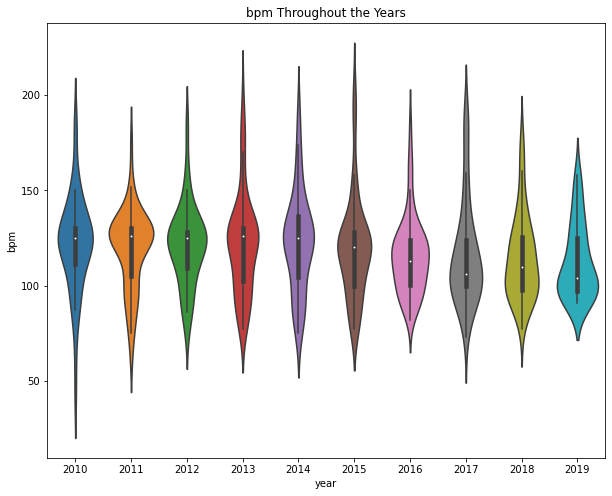

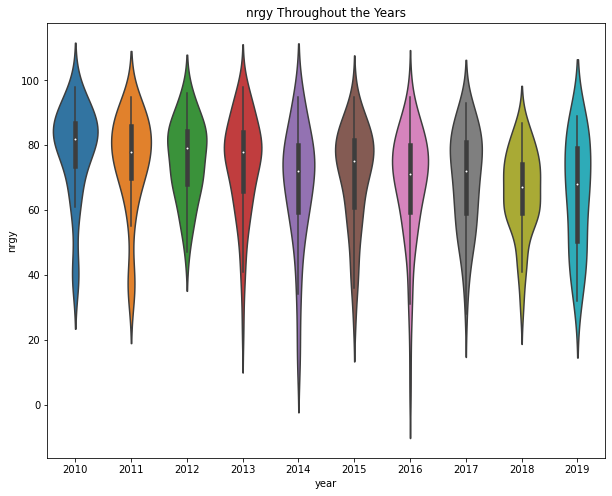

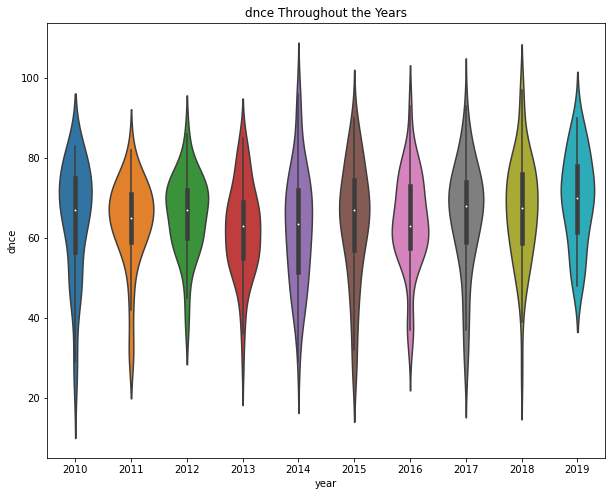

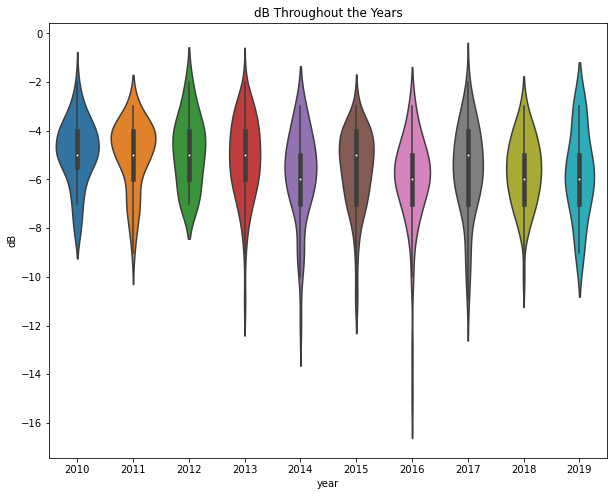

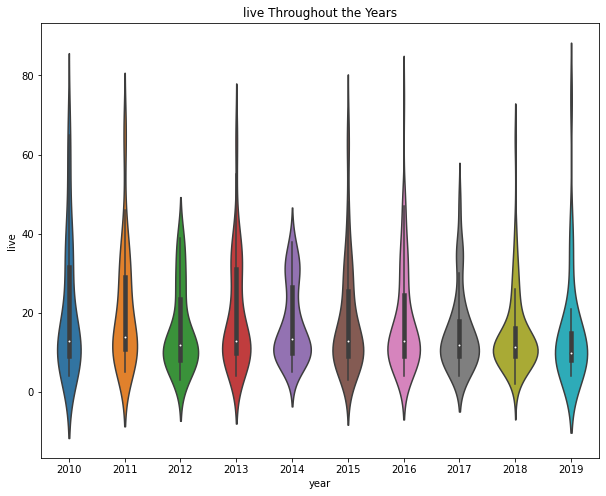

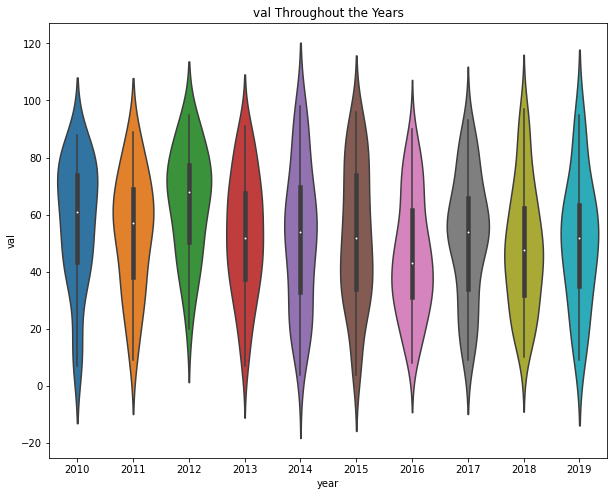

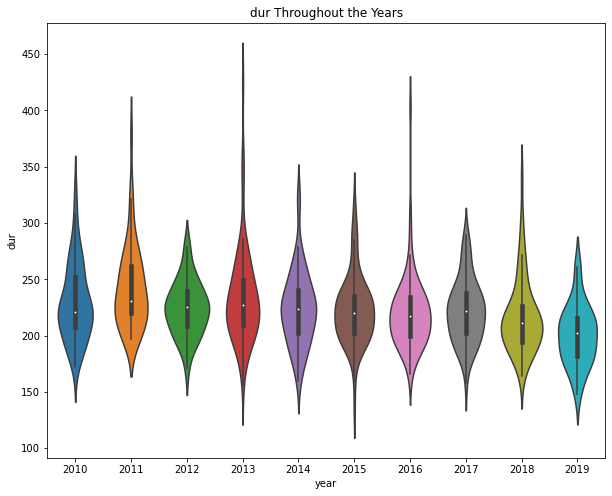

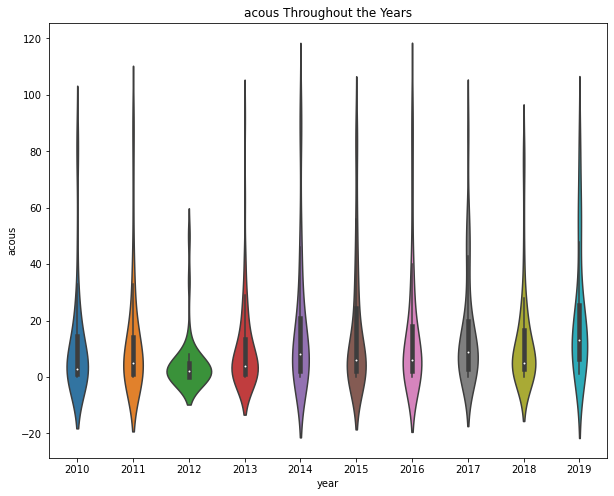

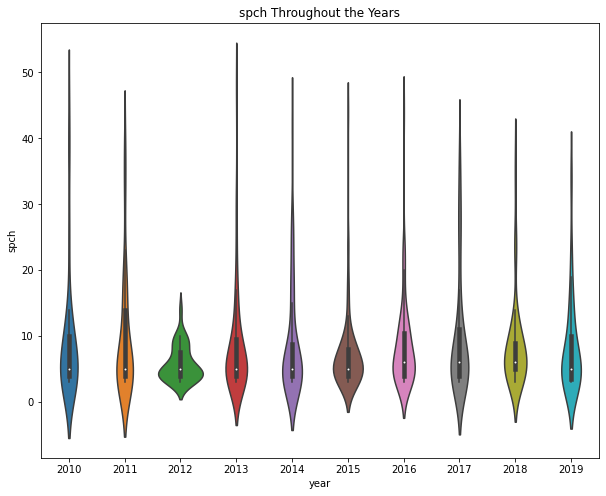

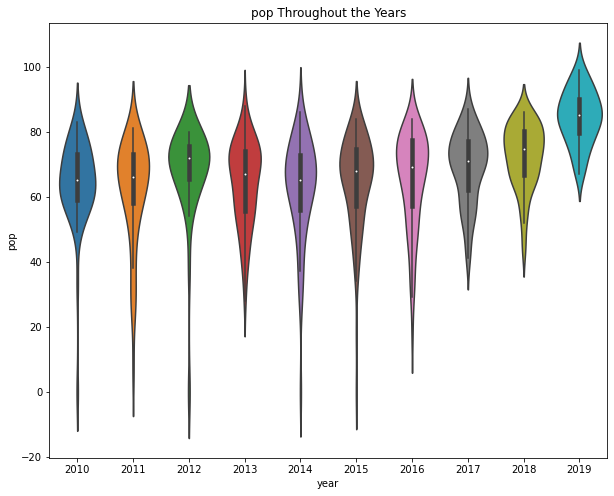

In [112]:
cols = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']
for var in cols:
    plt.figure(figsize = (10, 8))
    plt.title(var + " Throughout the Years")
    sns.violinplot(x = 'year', y = var, data = data)
    plt.show()

First, look at the beats per minute, it appears that over the decade, the mean beats per minute has gradually gone down, based on the central statistic, although there definitely exist outliers on both ends. The energy has also gone down, but in general the energy for the top songs seems very high, above 60, even though spotify's ranking goes until zero. Again, a few outliers exist in this data too, but thankfully the inner boxplot's mean is robust.

Moving on to danceability, there is not much correlation or a trend in distribution; the plots look centered and close to the middle, with outliers in both directions. Likewise, the volume, recorded as the amount of decibals, is also not really affected by year, and neither is the liveliness. Regarding liveliness, it is important to note that top songs for the most part feature low amounts of liveliness, with the exception of a few outliers. Valence is evenly distributed from both ends of the spectrum, and does not change much over time, only increasing a little bit, which supports that the amount of valence largely varies, not being centered around a particular point, and continues like that over time. 

In addition, the durations of the songs have only slightly decreased, although it makes sense that the durations are short given spotify's giant scale, since most popular songs are broadcast on the radio and other events, and too much time could be perceived as a waste other than special situations. Acousticity is also extremely low, average near zero, with the overwhelming majority of songs relying on electronic music - this has remained constant throughout the decade. Speech has also been very low, with 2013 having no outliers in the amount of words spoken. Lastly, popularity hasn't really changed, which makes complete sense since there are always some songs more popular than others. 

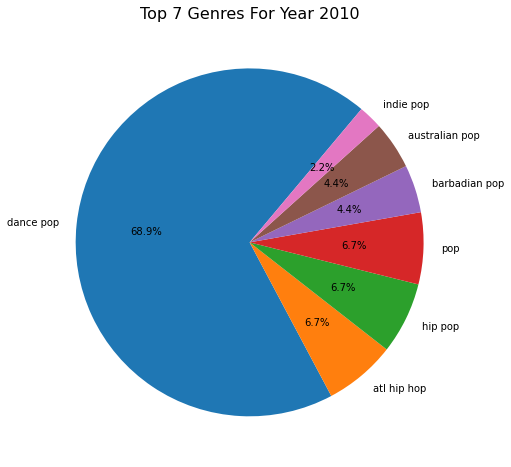

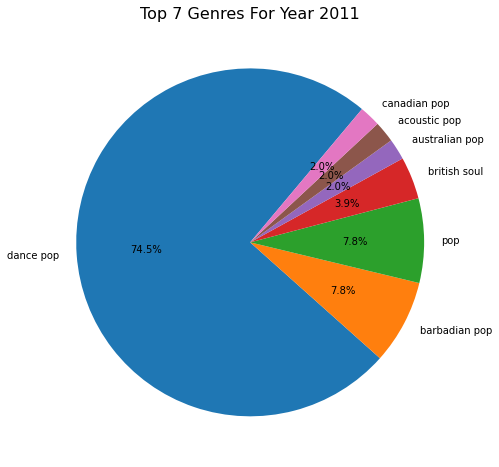

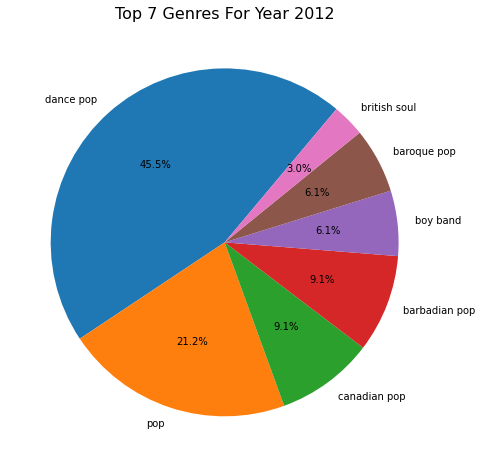

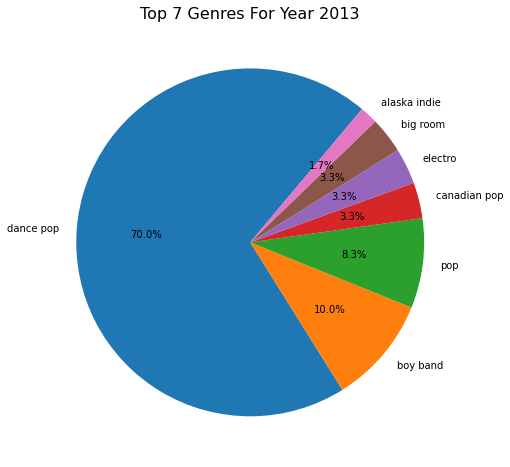

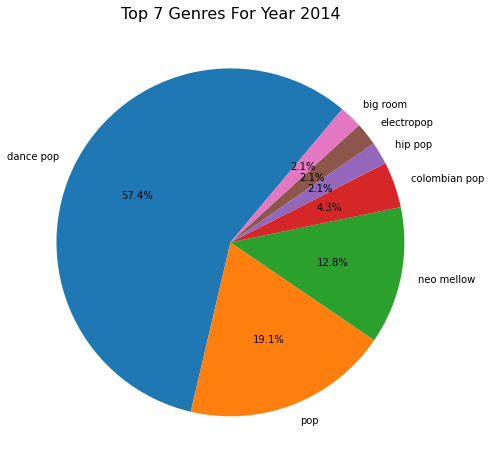

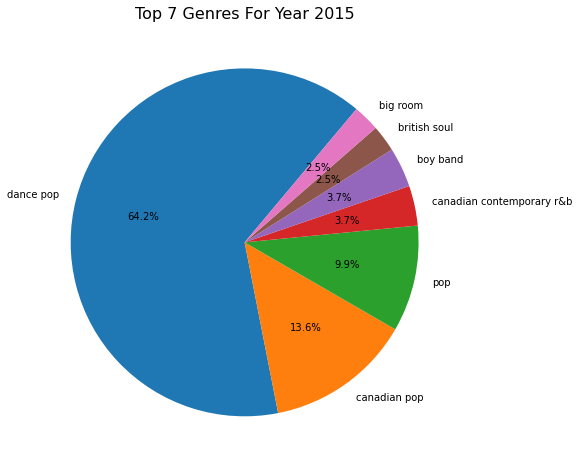

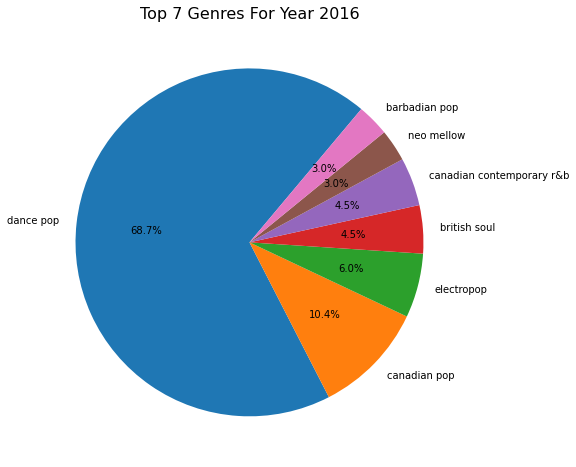

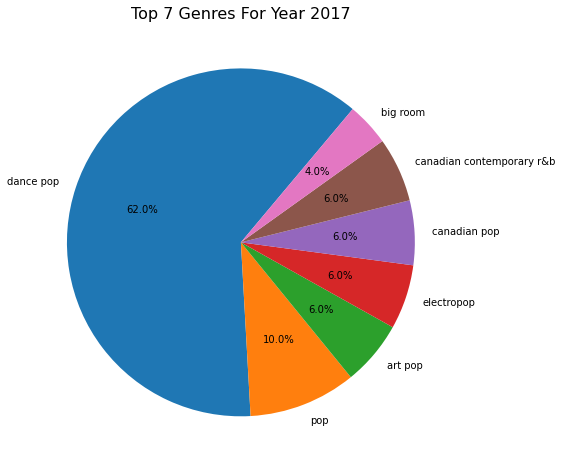

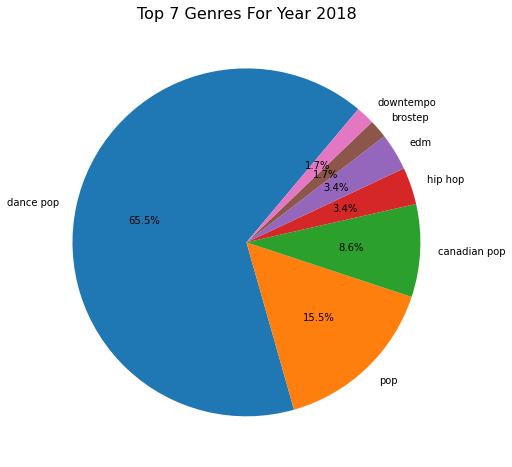

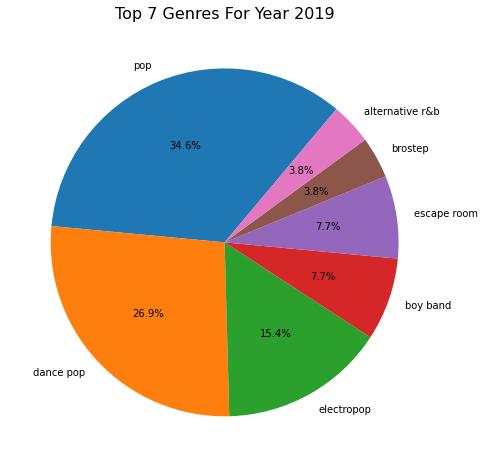

In [113]:
for x in range(2010, 2020):
    data2 = data[data['year'] == x]
    plt.figure(figsize = (10, 8))
    plt.pie(data2['top genre'].value_counts().iloc[:7],labels=data2['top genre'].value_counts().iloc[:7].index,
    autopct='%1.1f%%', shadow=False, startangle=50)
    plt.title('Top 7 Genres For Year ' + str(x),fontsize=16)
    plt.show()

Looking at the pie charts, it seems that dance pop has been the most popular genre throughout the years until 2019. Pop has been consistently the second most popular genre until it became the first most streamed genre in 2019, beating dance pop. However, in 2013, the genre boy band was the second most played genre over pop which came in third. Looking at the dataset, 2013 experienced more boy band tracks than other years as One Direction had experienced immense global popularity in 2013 along with boy band The Wanted. In 2016, pop is not even on the pie chart, but this could be an error on Spotify's part on how they categorize tracks' genres as they only gave each track one genre when it could fall under multiple genres. For example, Canadian pop is essentially pop, only the singer is from Canada such as Justin Bieber, Shawn Mendes, Drake, and many other popular singers with many top tracks.

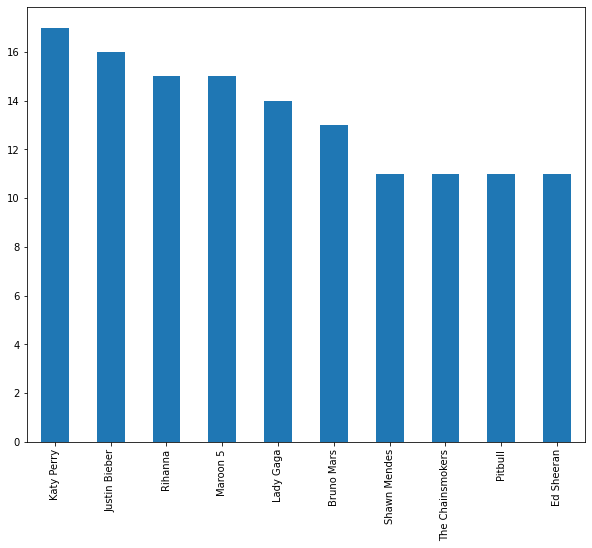

In [114]:
plt.figure(figsize = (10, 8))
data['artist'].value_counts().head(10).plot.bar()

This bar graph shows the top ten artists with the most top tracks with Katy Perry coming in first with 17 top tracks. However, we'll look into how popular their music was each year and how artists have changed over the years as an artist can release many top hits in one year but then none in the later years. This could give us an insight on how music trends have changed with the changes in artists and their respective genres.

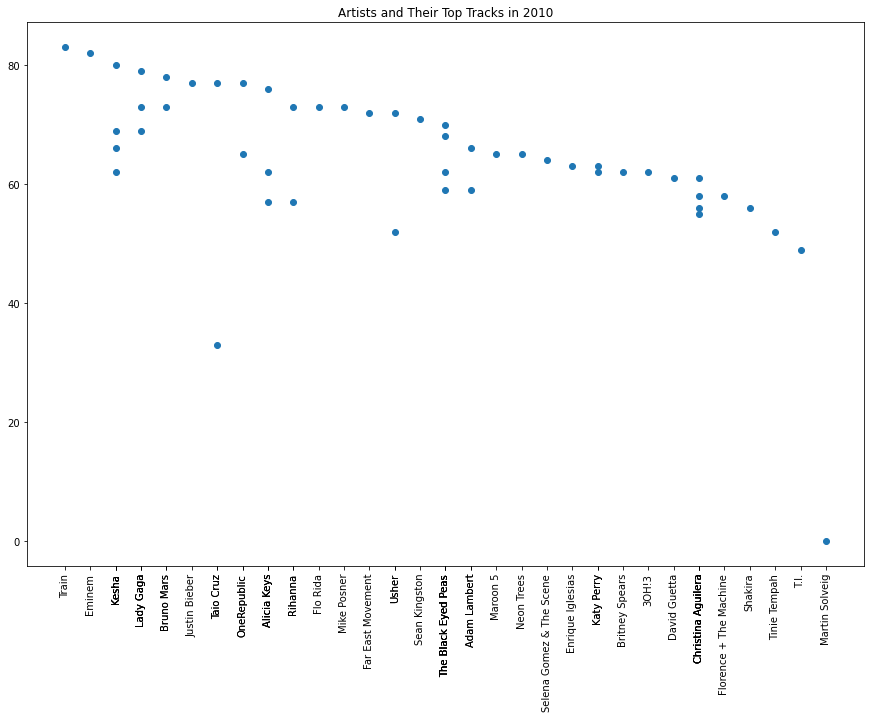

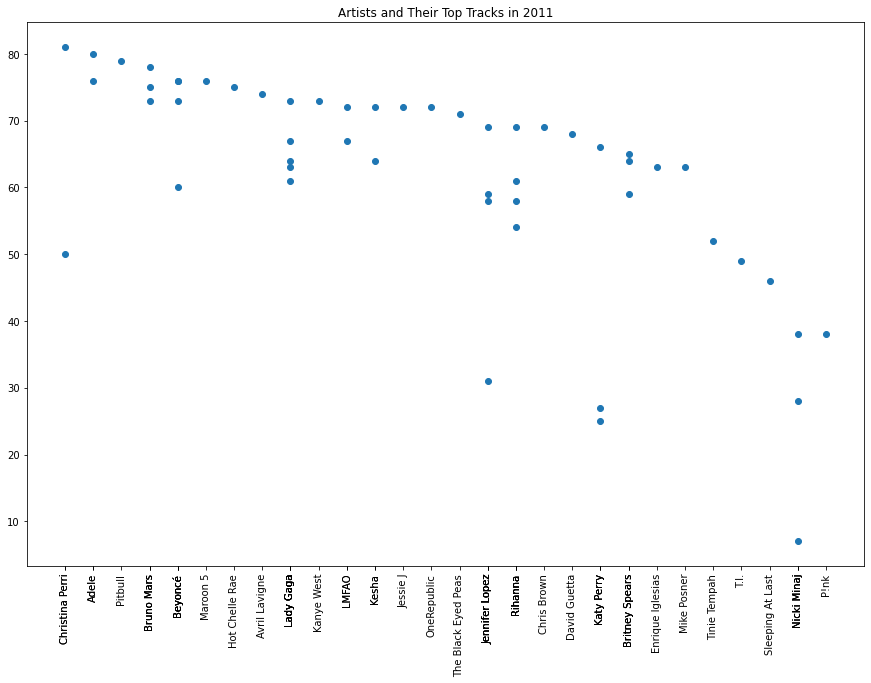

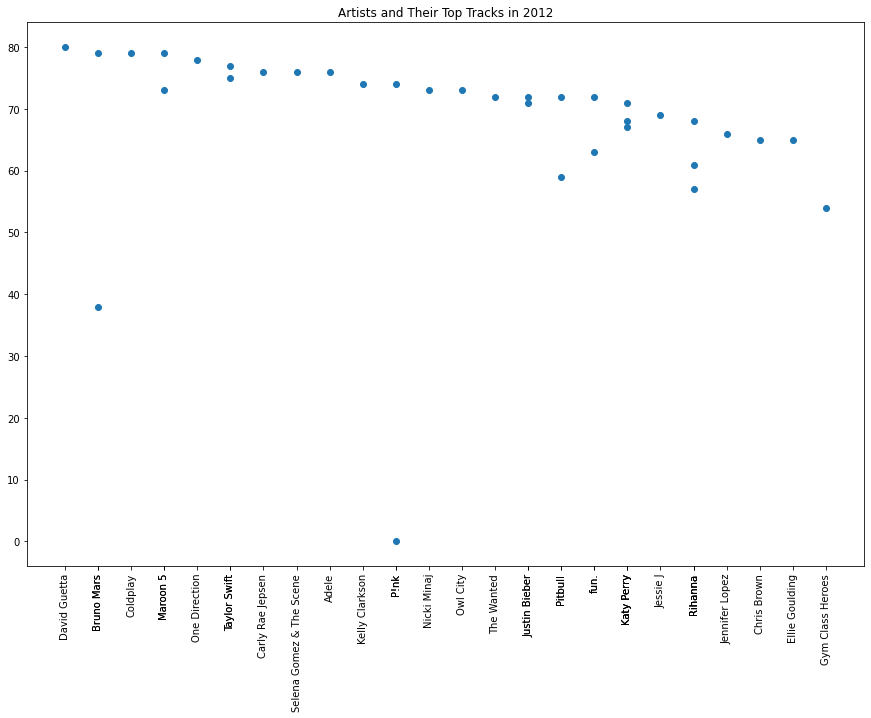

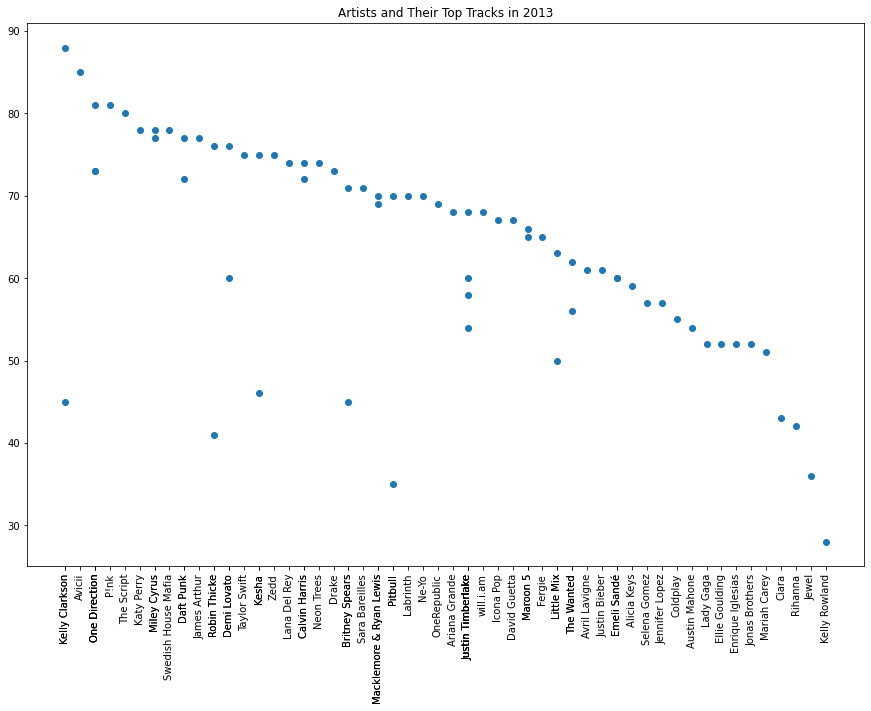

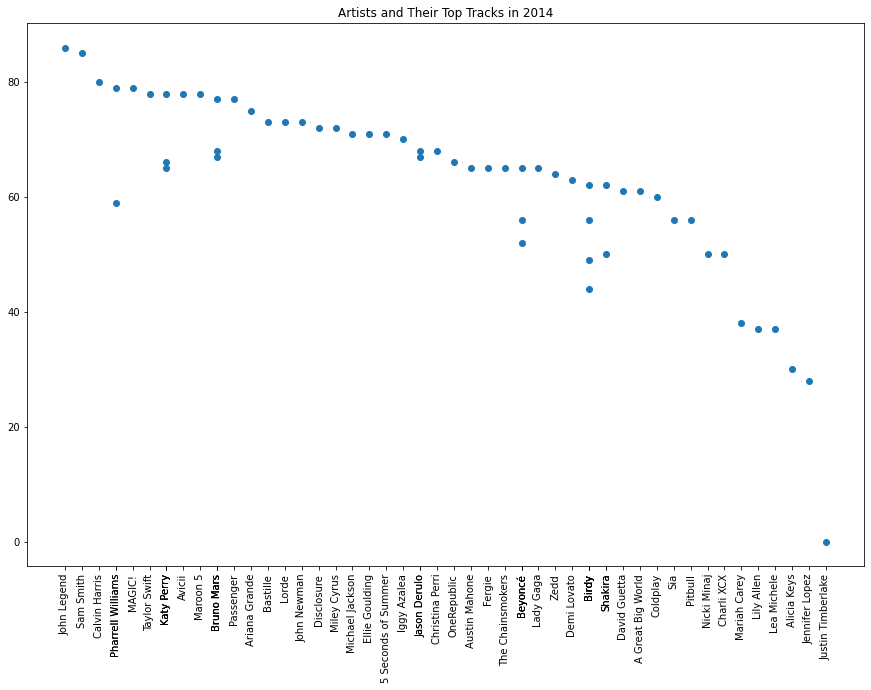

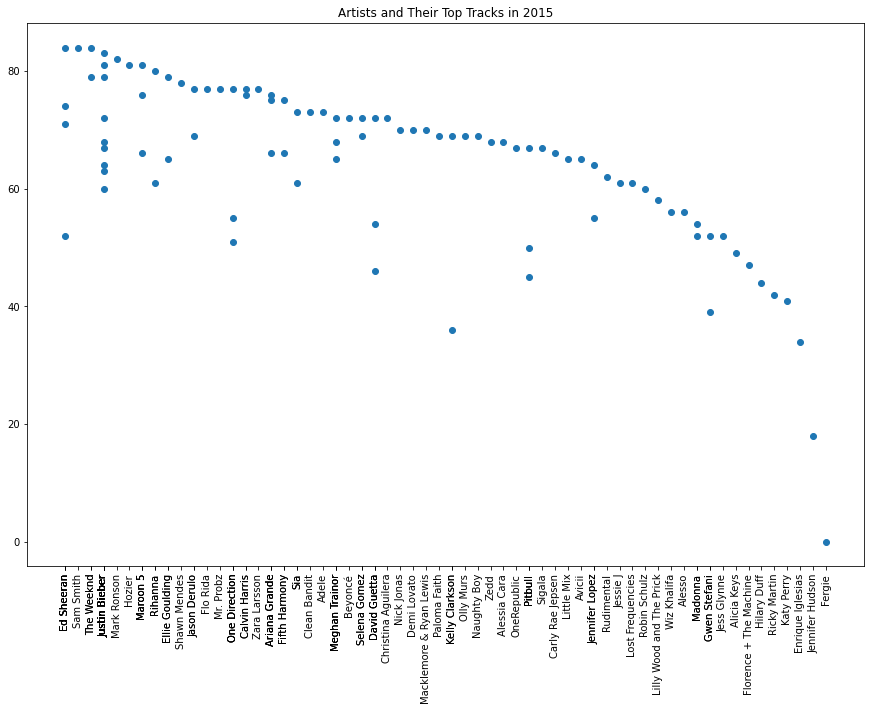

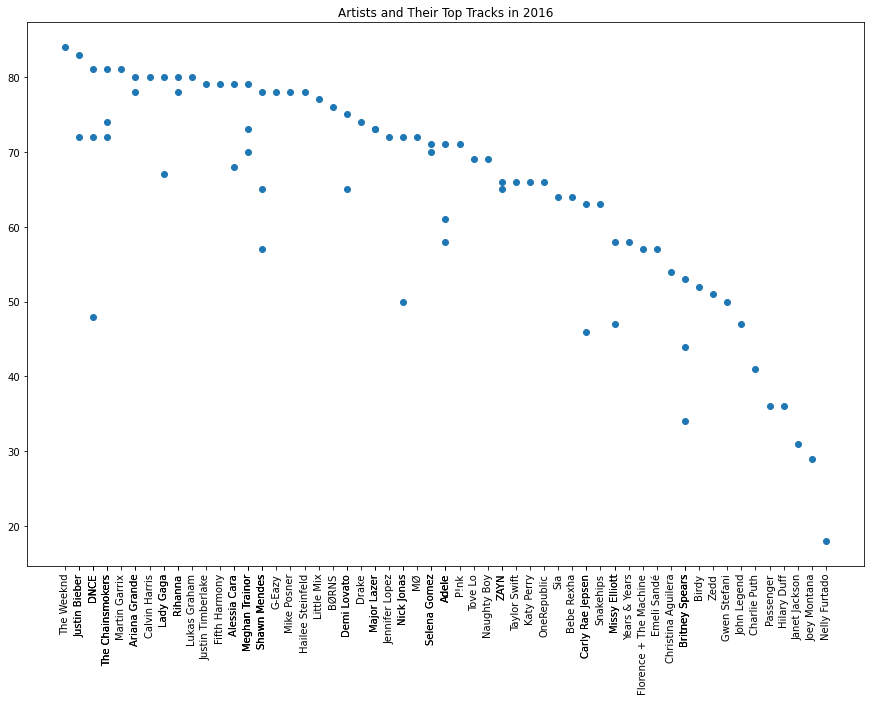

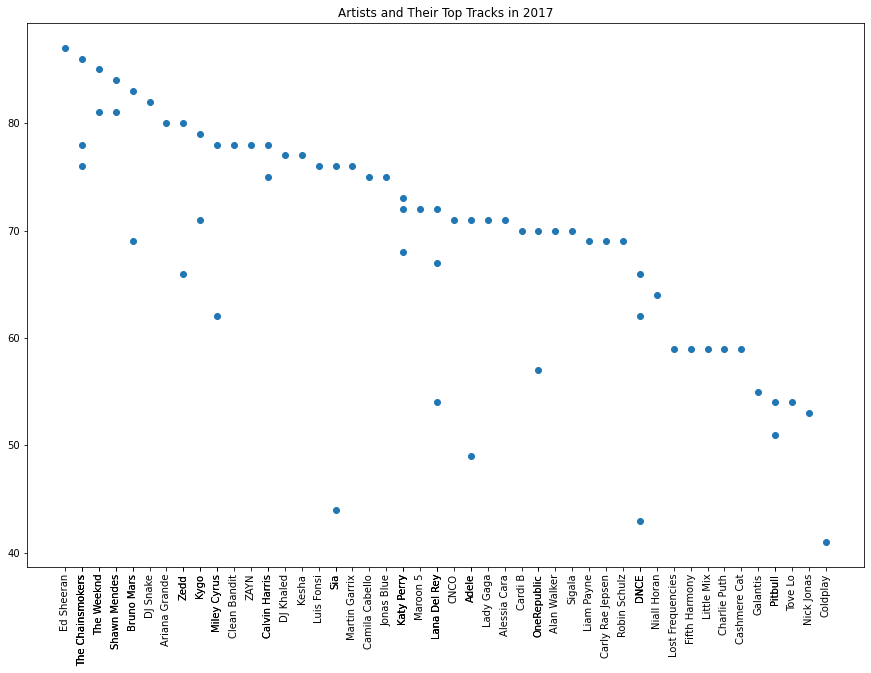

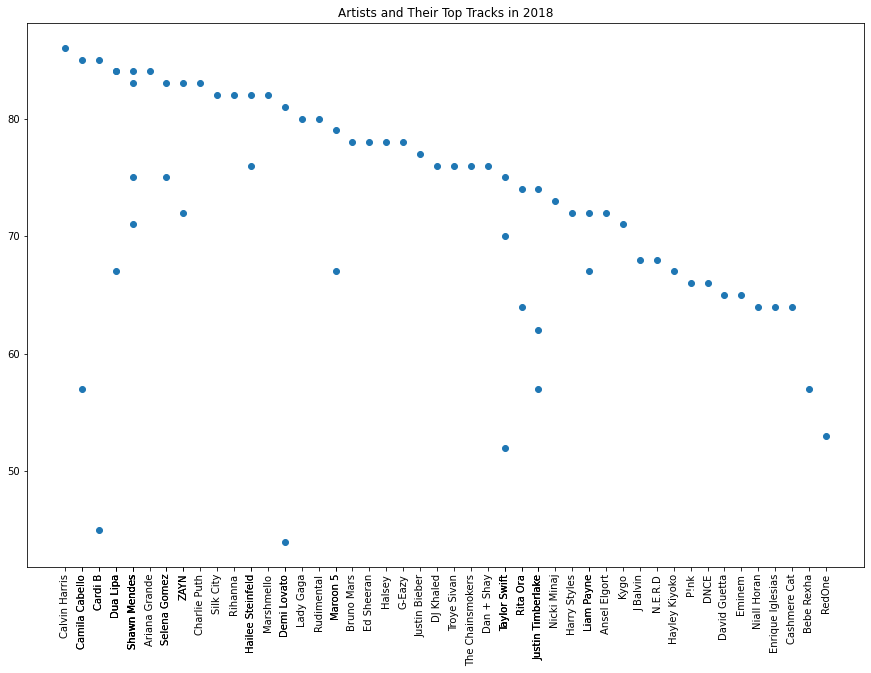

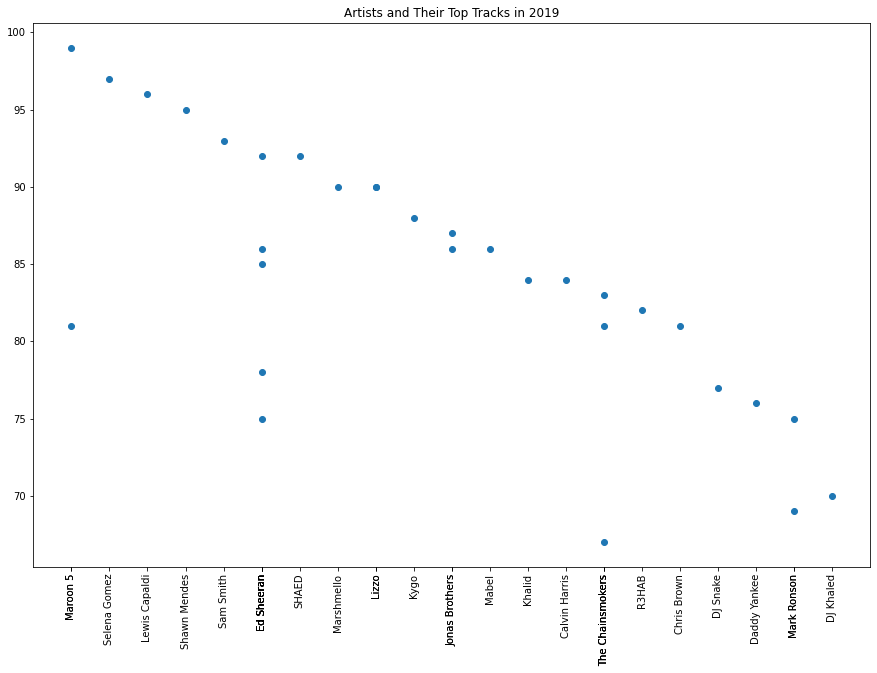

In [115]:
for x in range(2010, 2020):
    data2 = data[data['year'] == x]
    plt.figure(figsize = (15, 10))
    plt.title('Artists and Their Top Tracks in ' + str(x))
    plt.scatter(data2['artist'], data2['pop'])
    plt.xticks(data2['artist'], data2['artist'], rotation='vertical')
    plt.show()

Looking at the scatter plots of artists and their top tracks in each year, we can see the changes in artists throughout the years.

In 2010, Kesha had 4 top dance pop tracks with the highest popularity of of 80 and Lady Gaga had 3 top dance pop tracks with the highest popularity of 79. The Black Eyed Pease also had 4 top dance pop tracks. In 2011, Lady Gaga came out with the most top dance pop tracks with 5 songs that were consistently higher in popularity along with many other dance pop artists such as Jennifer Lopez, Kesha, LMFAO, Beyoncé, and more. However, in the later years, these artists rarely appeared in the charts. The Black Eyed Peas, LMFAO, Kesha, and many other artists never appeared again which correlates with the decline in dance pop genre as we've seen in the pie charts earlier. This could be due to no release of new music by the artists as Wikipedia shows that Black Eyed Peas did take an eight years hiatus after they released their album in 2010. Kesha also took a five years break after her album in 2012 according to her Wikipedia page. This could be a factor in why the dance pop genre declined in the top tracks as major dance pop artists took long hiatuses.

We also see new artists joining the charts in later years as Ed Sheeran first appears in 2015 with 4 top tracks and having the highest popularity in that year. Canadian pop also was the second most played genre in 2015 as Justin Bieber totaled 9 top Canadian pop tracks and The Weeknd comes out on the plots for the first time with a Canadian pop track having the highest popularity tied with Ed Sheeran.

With the hiatuses of many artists and debuts of other artists, it changes the most streamed genres each year. It's also interesting to note the increase in artists and tracks throughout the years as there are more scatter dots in 2013 and the later years than the earlier years. This could be due to Spotify's increase in users as Spotify was said to have about 650,000 paying users at the end of 2010 while there are 18 million users in 2015 which continued to increase to 113 million users in the third quarter of 2019 according to gigaom.com and statista.com.

We also want to analyze a subset of the top songs: the top fives. These songs are the best of the best, and represent the most exempelary aspects of the dataset, so we want to see if these songs have various scores higher than the means, or if they are more towards the expected values (and thus are a good representation of the overall data). First, let's filter out the top fives through the rank. 

In [116]:
top5 = data[data['rank'] <= 5]
top5.head(20)

,rank,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
51,1,A Thousand Years,Christina Perri,dance pop,2011,139,41,42,-7,11,16,285,31,3,81
52,2,Someone Like You,Adele,british soul,2011,135,33,56,-8,10,28,285,89,3,80
53,3,Give Me Everything,Pitbull,dance pop,2011,129,94,67,-3,30,53,252,19,16,79
54,4,Just the Way You Are,Bruno Mars,pop,2011,109,84,64,-5,9,43,221,2,4,78
55,5,Rolling in the Deep,Adele,british soul,2011,105,76,73,-5,5,52,228,13,3,76


Once we do that, we want to compare the Spotify scores of the top fives with each other, to see if the data is overall normally distributed or skewed in one direction. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7e6ef4100>,
      dtype=object)

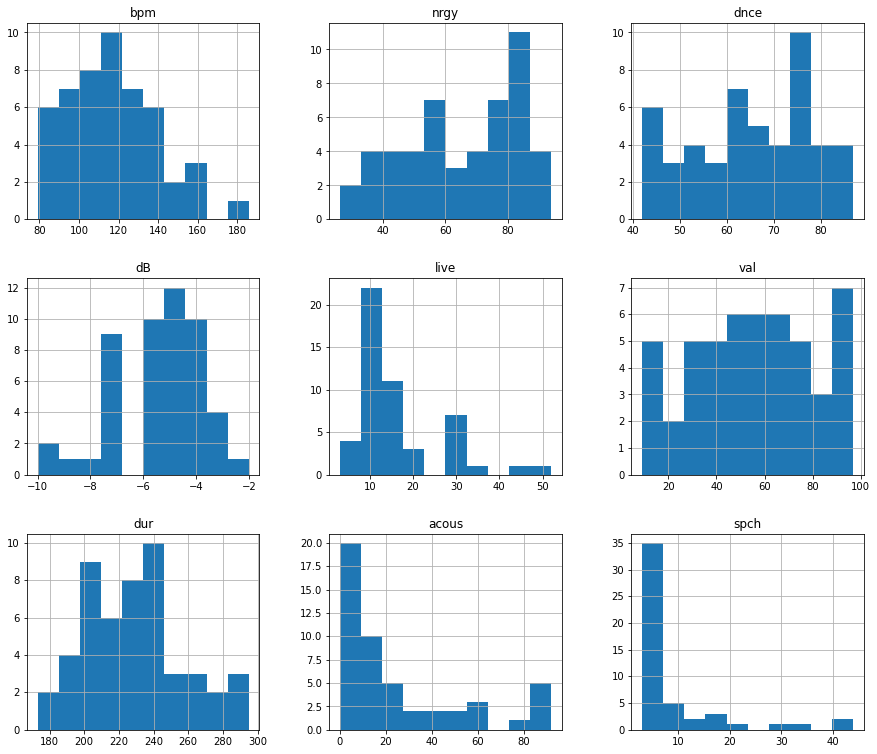

In [117]:
top5.hist(figsize = (15, 13), column = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch'])

The histograms above look like the expected outcome, consistent with the violin plots of the entire dataset. Duration, volume, energy, and beats per minute tend toward a normal distribution, while the speech and acousticity are skewed towards the left side, due to spotify's extremely high upper spectrum. The dance and the valence are uniformly distributed as well. 

We also want to compare the mean scores of the top fives with that of the entire dataset, which we will do below. 

,top 5,total
bpm,117.16,118.742525
nrgy,65.46,70.621262
dnce,65.12,64.486711
dB,-5.48,-5.488372
live,15.56,17.803987
val,55.56,52.312292
dur,229.60,224.671096
acous,24.58,14.350498
spch,8.88,8.372093


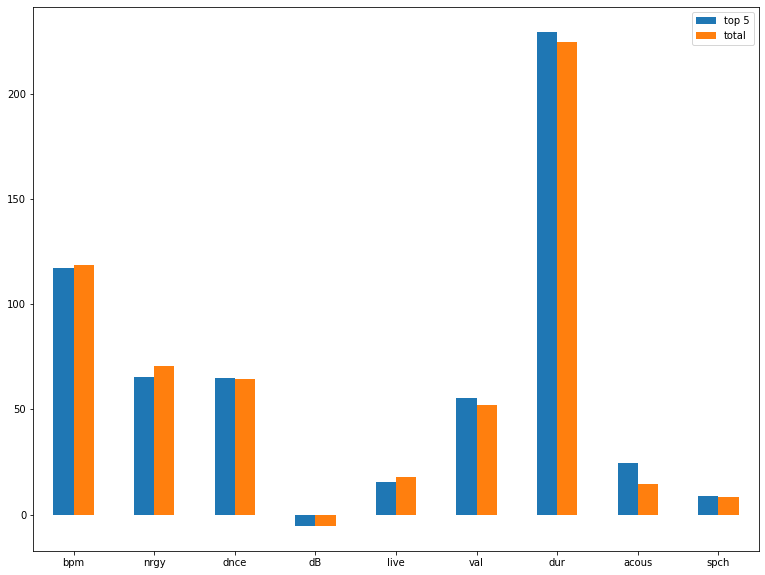

In [118]:
means = pd.DataFrame(top5.mean())
means['total'] = data.mean()
means = means.rename(columns = {0 : 'top 5'})
means = means.drop(['year', 'pop', 'rank'])
means.plot.bar(rot =0, figsize = (13, 10))
means

It appears that the top fives do not have any drastic change in the variables, with the exception of acousticity, which is significantly higher, almost double, over the mean of the entire dataset. One possible reason for that may include an outlier in the top fives that greatly influences the data, or simply that the top songs are more instrumental which may influence popularity. Overall, though, the top fives are a good representation of the data as a whole, rather than being higher examples of certain types of scores. 

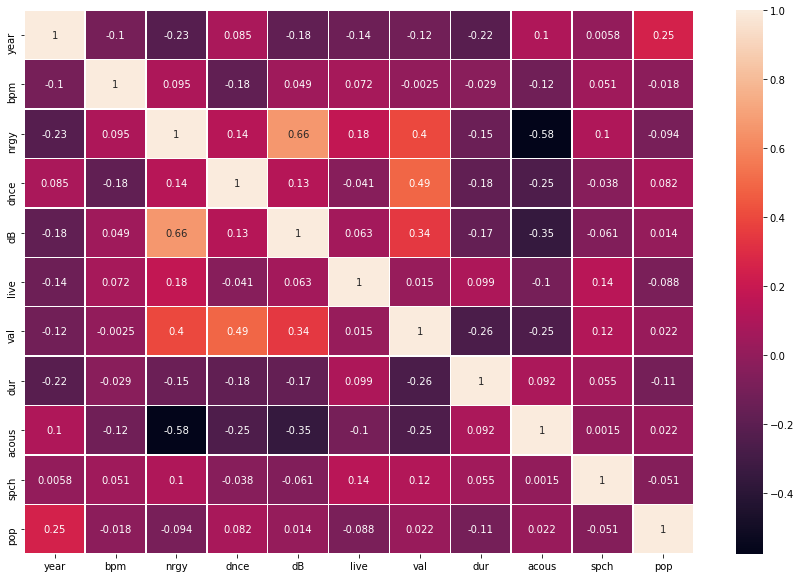

In [119]:
data2 = data.copy()
data2.drop('rank', axis =1, inplace=True)
corr_matrix=data2.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax);

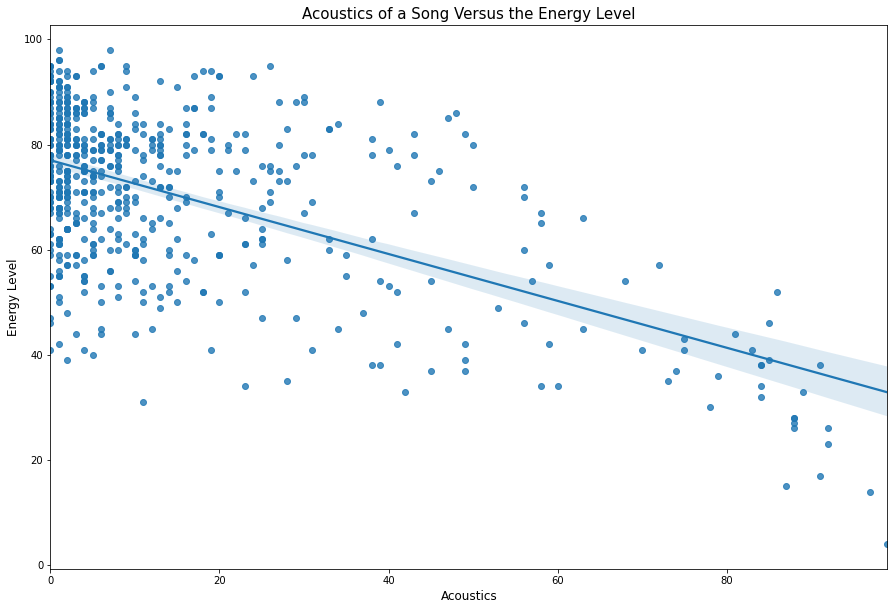

In [120]:
fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x=data.acous,y=data.nrgy, ax=ax).set_title('Acoustics of a Song Versus the Energy Level',fontsize=15)
plt.xlabel('Acoustics',fontsize=12);
plt.ylabel('Energy Level',fontsize=12);

slope = [[-0.44589593]]
intercept = [77.02009125]
r2 = 0.33


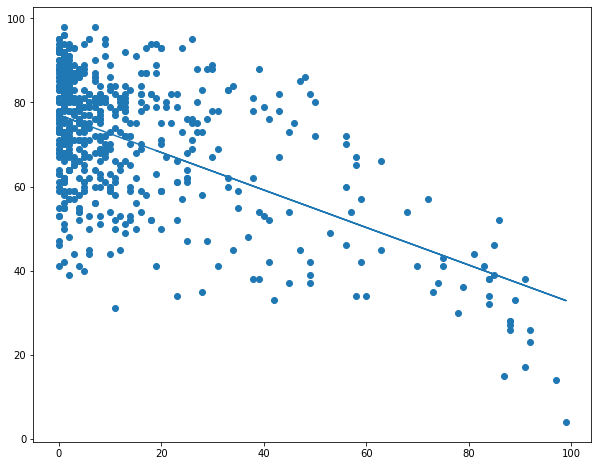

In [121]:

data[['nrgy','acous']].to_numpy()
linreg = LinearRegression().fit(data[['acous']],data[['nrgy']])
acousPred = linreg.predict(data[['acous']])
#printing the slope and r2 of the linear regression line
print('slope =', linreg.coef_)
print('intercept =', linreg.intercept_)
print('r2 = %.2f'
      % r2_score(data[['nrgy']], acousPred))
#plotting the predicted best line onto the graph
plt.figure(figsize = (10, 8))
plt.scatter(data[['acous']], data[['nrgy']])
plt.plot(data[['acous']],acousPred)
plt.show()

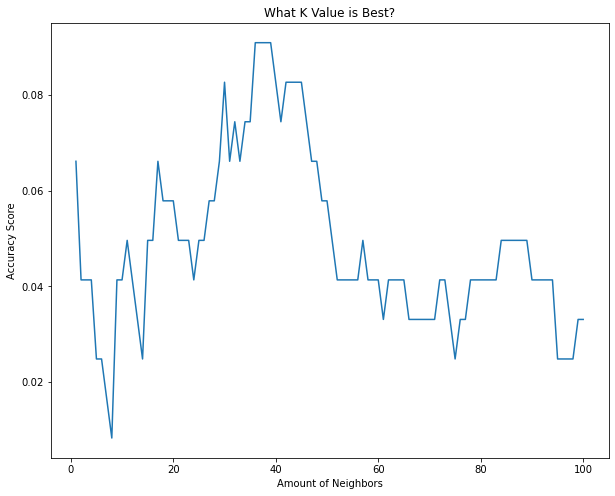

In [122]:
all_data=data[["nrgy","acous","dB","dnce","val"]]
labels=data["pop"]
training_data,validation_data,training_labels,validation_labels=train_test_split(all_data,
                                   labels,
                                   test_size=.2,
                                   random_state=100)
k_list=range(1,101)
accuracies=[]
for k in range(1,101):
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(training_data,training_labels)
    accuracies.append(classifier.score(validation_data,validation_labels))
plt.figure(figsize = (10, 8))
plt.plot(k_list,accuracies)
plt.xlabel('Amount of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('What K Value is Best?')
plt.show()

Here, we used sklearn's K Nearest Neighbors algorithm to try and predict the popularity value from energy, acoustics, loudness, danceability, and valence. We used these values because they had the most correlation to each other as seen from the heat correlation map. We then split the data into 8 parts training data and 2 parts test data and repeatedly ran the algorithm 100 times and plotted the accuracy of each k value onto a graph.

In [123]:
knn = KNeighborsClassifier(n_neighbors=39)
knn.fit(training_data, training_labels)
y_pred = knn.predict(validation_data)
print("Accuracy:",metrics.accuracy_score(validation_labels, y_pred))
#this is to be expected because it is trying to predict a continuous variable

Accuracy: 0.09090909090909091


Yikes! The best accuracy we could get is only 9.09%; however, this is to be expected because we are working with a pretty small dataset and are trying to predict a continuous variable. Let's try this again for a qualitative variable.

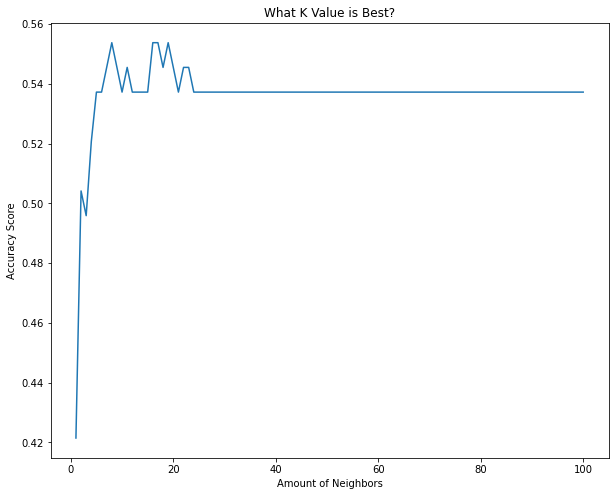

In [124]:
data.rename(columns = {'top genre':'topgenre'}, inplace = True) 
top_genre_mapping={"dance pop": 0,
                 "pop": 1,
                 "canadian pop": 2,
                 "barbadian pop": 3,
                 "boy band": 4,
                 "electropop": 5,
                 "big room": 6,
                 "british soul": 7,
                 "neo mellow": 8,
                 "canadian contemporary r&b": 9,
                 "art pop": 10,
                 "hip pop": 11,
                 "complextro": 12,
                 "australian dance": 13,
                 "atl hip hop": 14,
                 "edm": 15,
                 "australian pop": 16,
                 "hip hop": 17,
                 "latin": 18,
                 "permanent wave": 19,
                 "tropical house": 20,
                 "colombian pop": 21,
                 "electronic trap": 22,
                 "candy pop": 23,
                 "folk-pop": 24,
                 "indie pop": 25,
                 "acoustic pop": 26,
                 "canadian hip hop": 27,
                 "detroit hip hop": 28,
                 "electro": 29,
                 "brostep": 30,
                 "belgian edm": 31,
                 "baroque pop": 32,
                 "escape room": 33,
                 "downtempo": 34,
                 "danish pop": 35,
                 "chicago rap": 36,
                 "australian hip hop": 37,
                 "moroccan pop": 38,
                 "metropopolis": 39,
                 "irish singer-songwriter": 40,
                 "contemporary country": 41,
                 "house": 42,
                 "french indie pop": 43,
                 "electro house": 44,
                 "hollywood": 45,
                 "alternative r&b": 46,
                 "canadian latin": 47,
                 "celtic rock": 48,
                 "alaska indie": 49}
labels=data.topgenre.map(top_genre_mapping)
training_data,validation_data,training_labels,validation_labels=train_test_split(all_data,
                                   labels,
                                   test_size=.2,
                                   random_state=100)
k_list=range(1,101)
accuracies=[]
for k in range(1,101):
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(training_data,training_labels)
    accuracies.append(classifier.score(validation_data,validation_labels))
plt.figure(figsize = (10, 8))
plt.plot(k_list,accuracies)
plt.xlabel('Amount of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('What K Value is Best?')
plt.show()

#the accuracy isnt bad, only low because there are many genres that only have 1 top song
#lets get rid of the genres that only have 1 or 2 songs to see how accuracy is affected.

Here, we used sklearn's K Nearest Neighbors algorithm to try and predict the music genre from energy, acoustics, loudness, danceability, and valence. We split the data 8:2 again and plotted the accuracy of each k value onto a graph. We reached an accuracy of around 55.2% but this is because many of the genres listed only have one or two songs that reached the top 50 songs for each year. This is just a consequence of using a small dataset with a large bias - the bias being its popularity. Let's try it one more time, taking out the genres that only have one or two songs in the dataset.

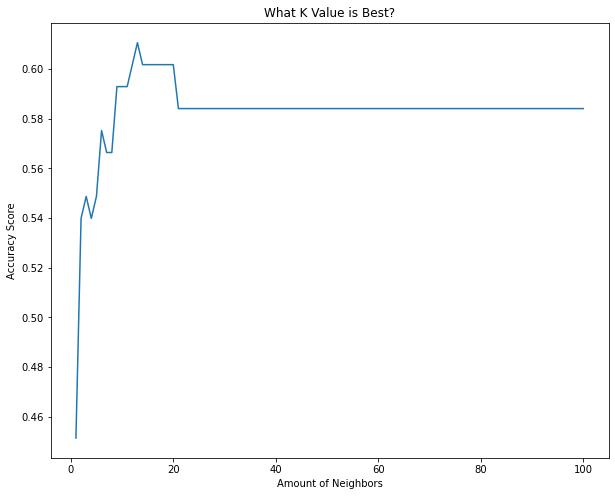

In [125]:
data2 = data[~data['topgenre'].isin(["electronic trap","candy pop","folk-pop","indie pop","acoustic pop","canadian hip hop","detroit hip hop","electro","brostep","belgian edm","baroque pop","escape room","downtempo","danish pop","chicago rap","australian hip hop","moroccan pop","metropopolis","irish singer-songwriter","contemporary country","house","french indie pop","electro house","hollywood","alternative r&b","canadian latin","celtic rock","alaska indie"])]

all_data=data2[["nrgy","acous","dB","dnce","val"]]
top_genre_mapping={"dance pop": 0,
                 "pop": 1,
                 "canadian pop": 2,
                 "barbadian pop": 3,
                 "boy band": 4,
                 "electropop": 5,
                 "big room": 6,
                 "british soul": 7,
                 "neo mellow": 8,
                 "canadian contemporary r&b": 9,
                 "art pop": 10,
                 "hip pop": 11,
                 "complextro": 12,
                 "australian dance": 13,
                 "atl hip hop": 14,
                 "edm": 15,
                 "australian pop": 16,
                 "hip hop": 17,
                 "latin": 18,
                 "permanent wave": 19,
                 "tropical house": 20,
                 "colombian pop": 21}
labels=data2.topgenre.map(top_genre_mapping)
training_data,validation_data,training_labels,validation_labels=train_test_split(all_data,
                                   labels,
                                   test_size=.2,
                                   random_state=100)
k_list=range(1,101)
accuracies=[]
for k in range(1,101):
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(training_data,training_labels)
    accuracies.append(classifier.score(validation_data,validation_labels))
plt.figure(figsize = (10, 8))
plt.plot(k_list,accuracies)
plt.xlabel('Amount of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('What K Value is Best?')
plt.show()

In [126]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(training_data, training_labels)
y_pred = knn.predict(validation_data)
print("Accuracy:",metrics.accuracy_score(validation_labels, y_pred))
#little better

Accuracy: 0.6017699115044248


Hey not bad! We reached an accuracy of 60.2%.